<a href="https://colab.research.google.com/github/dchandana3513/Heart_Failure_Prediction-using-ANN/blob/main/Ann_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


Dense: A fully connected neural network layer.

BatchNormalization: Normalizes the activations of the previous layer at each batch, improving the training speed and stability.

Dropout: Regularization technique where randomly selected neurons are ignored during training, reducing overfitting.

LSTM: Long Short-Term Memory layer, a type of recurrent neural network (RNN) used for sequence prediction problems.

EarlyStopping: Stops training when a monitored metric has stopped improving.

ModelCheckpoint: Saves the model after every epoch.

In [6]:
data = pd.read_csv("/content/Heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<ipython-input-7-25859c4f7b04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["DEATH_EVENT"], palette= cols)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

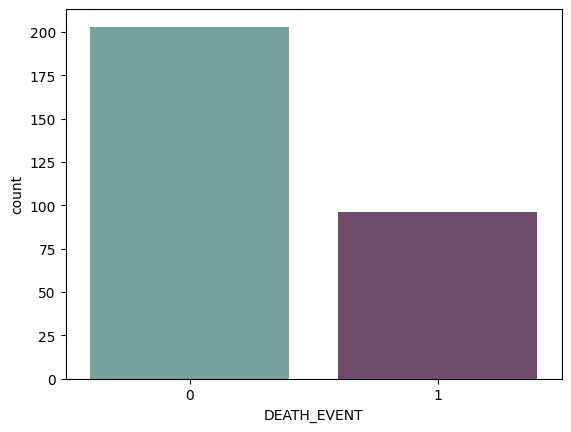

In [7]:
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

In [8]:


#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]


In [9]:

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,3.921055e-16,1.001676,-1.753828,-0.827980,-0.070469,0.771211,2.875411
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [10]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

In [11]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True)

In [12]:
model = Sequential()

In [13]:
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from tensorflow.keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Dense layer with 16 units (neurons).

kernel_initializer='uniform': Initializes the weights uniformly.

activation='relu': Applies the ReLU activation function.

input_dim=12: The input layer expects 12 features

Optimizer: adam
The Adam optimizer combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

Loss Function: binary_crossentropy
This loss function is suitable for binary classification tasks, measuring the performance of a classification model whose output is a probability value between 0 and 1.

Metrics: ['accuracy']
The model's performance will be evaluated using accuracy, which is the fraction of correctly predicted instances.

In [14]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)


Epoch 1/500
6/6 [==============================] - 2s 61ms/step - loss: 0.6929 - accuracy: 0.6313 - val_loss: 0.6921 - val_accuracy: 0.6667
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6920 - accuracy: 0.6480 - val_loss: 0.6912 - val_accuracy: 0.6667
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6911 - accuracy: 0.6480 - val_loss: 0.6902 - val_accuracy: 0.6667
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 0.6903 - accuracy: 0.6480 - val_loss: 0.6893 - val_accuracy: 0.6667
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6893 - accuracy: 0.6480 - val_loss: 0.6884 - val_accuracy: 0.6667
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6886 - accuracy: 0.6480 - val_loss: 0.6874 - val_accuracy: 0.6667
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6877 - accuracy: 0.6480 - val_loss: 0.6863 - val_accuracy: 0.6667
Epoch 8/500
6/6 [=====

An activation function in the context of neural networks is a mathematical function applied to each neuron in the network.
 Its primary purpose is to introduce non-linearity into the model, enabling the network to learn complex patterns in the data

In [15]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 66.67%


In [16]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()


3/3 [==============================] - 0s 5ms/step


In [17]:
y_test

268    0
240    0
278    0
176    0
202    0
      ..
24     1
62     0
249    0
90     0
50     1
Name: DEATH_EVENT, Length: 75, dtype: int64

sns.diverging_palette(): Creates a diverging color palette, which is useful for visualizing data that diverges around a midpoint.

cf_matrix / np.sum(cf_matrix): Normalizes the confusion matrix by dividing each element by the total number of elements in the matrix. This converts the counts to proportions, making it easier to interpret the relative performance of the classifier.


<Axes: >

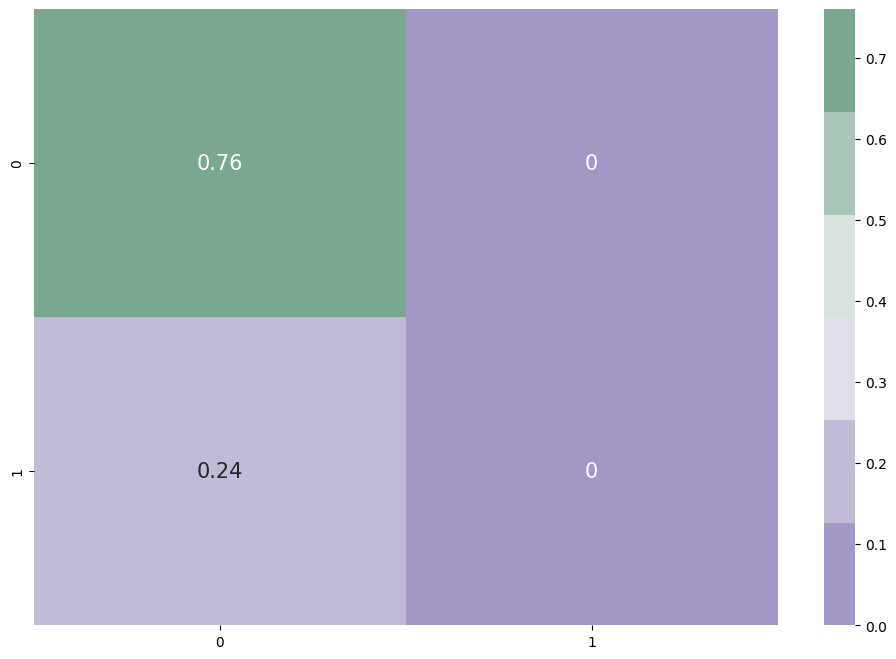

In [18]:
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})


Rectified Linear Unit (ReLU):

ReLU
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)

ReLU(x)=max(0,x)
Output range: [0, ∞)
Used in: Hidden layers.

Pros: Computationally efficient, mitigates vanishing gradient problem.

In [19]:
import numpy as np
def predict_single_row(row):
  # Convert the row to a NumPy array
  row = np.array(row)

  # Standardize the features
  row = s_scaler.transform(row.reshape(1, -1))

  # Predict the output
  prediction = model.predict(row)

  # Convert the prediction to a binary value (0 or 1)
  prediction = (prediction > 0.5).astype(int)

  return prediction[0]

# Example usage
new_row = [65, 0, 0, 140, 254, 0, 1, 158, 0, 0.4, 1, 2]
prediction = predict_single_row(new_row)
print("Prediction:", prediction)


1/1 [==============================] - 0s 65ms/step
Prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
